In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/DS/proj/fy24-capital-budget-plan-recommended.csv")

In [ ]:
print(df.shape)

(433, 22)


In [ ]:
df.columns

Index(['Department', 'Project_Name', 'Scope_Of_Work', 'PM_Department',
       'Project_Status', 'Neighborhood', 'Authorization_Existing',
       'Authorization_FY', 'Authorization_Future', ' Grant_Existing ',
       ' Grant_FY ', ' Grant_Future ', 'GO_Expended', 'Capital_Year_0',
       ' CapitalYear_1 ', 'Capital_Year_25', 'Grant_Expended', 'Grant_Year_0',
       ' Grant_Year_1 ', 'GrantYear_25', 'External_Funds',
       'Total_Project_Budget'],
      dtype='object')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.fillna(0, inplace=True)

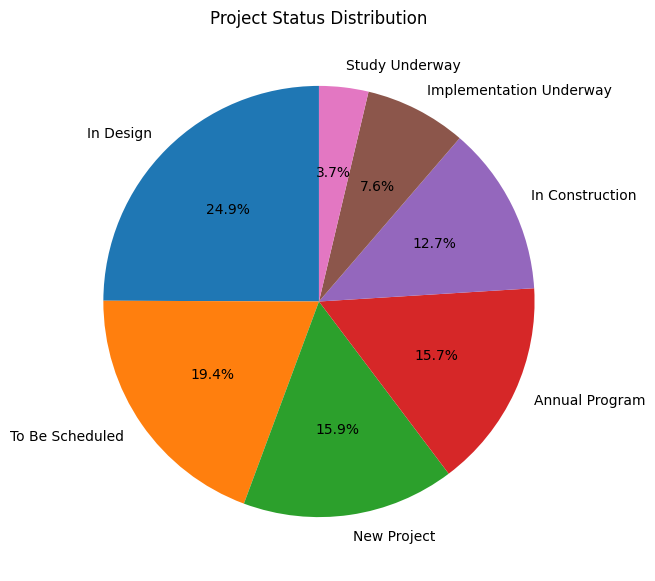

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/My Drive/DS/proj/fy24-capital-budget-plan-recommended.csv")

# Create a pie chart for Project Status
project_status_counts = df['Project_Status'].value_counts()
project_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10,7))
plt.title("Project Status Distribution")
plt.ylabel('')  # to remove the default 'Project_Status' label
plt.show()


In [9]:
unique_values = df['Department'].unique()

# Print the unique values
for value in unique_values:
    print(value)

Boston Centers for Youth and Families
Boston Planning and Development Agency
Boston Public Library
Boston Public Schools
Department of Innovation and Technology
Emergency Management
Environment Department
Fire Department
Mayor's Office of Housing
Office of Arts & Culture
Office of New Urban Mechanics
Parks and Recreation Department
Police Department
Property Management Department
Public Health Commission
Public Works Department
Transportation Department


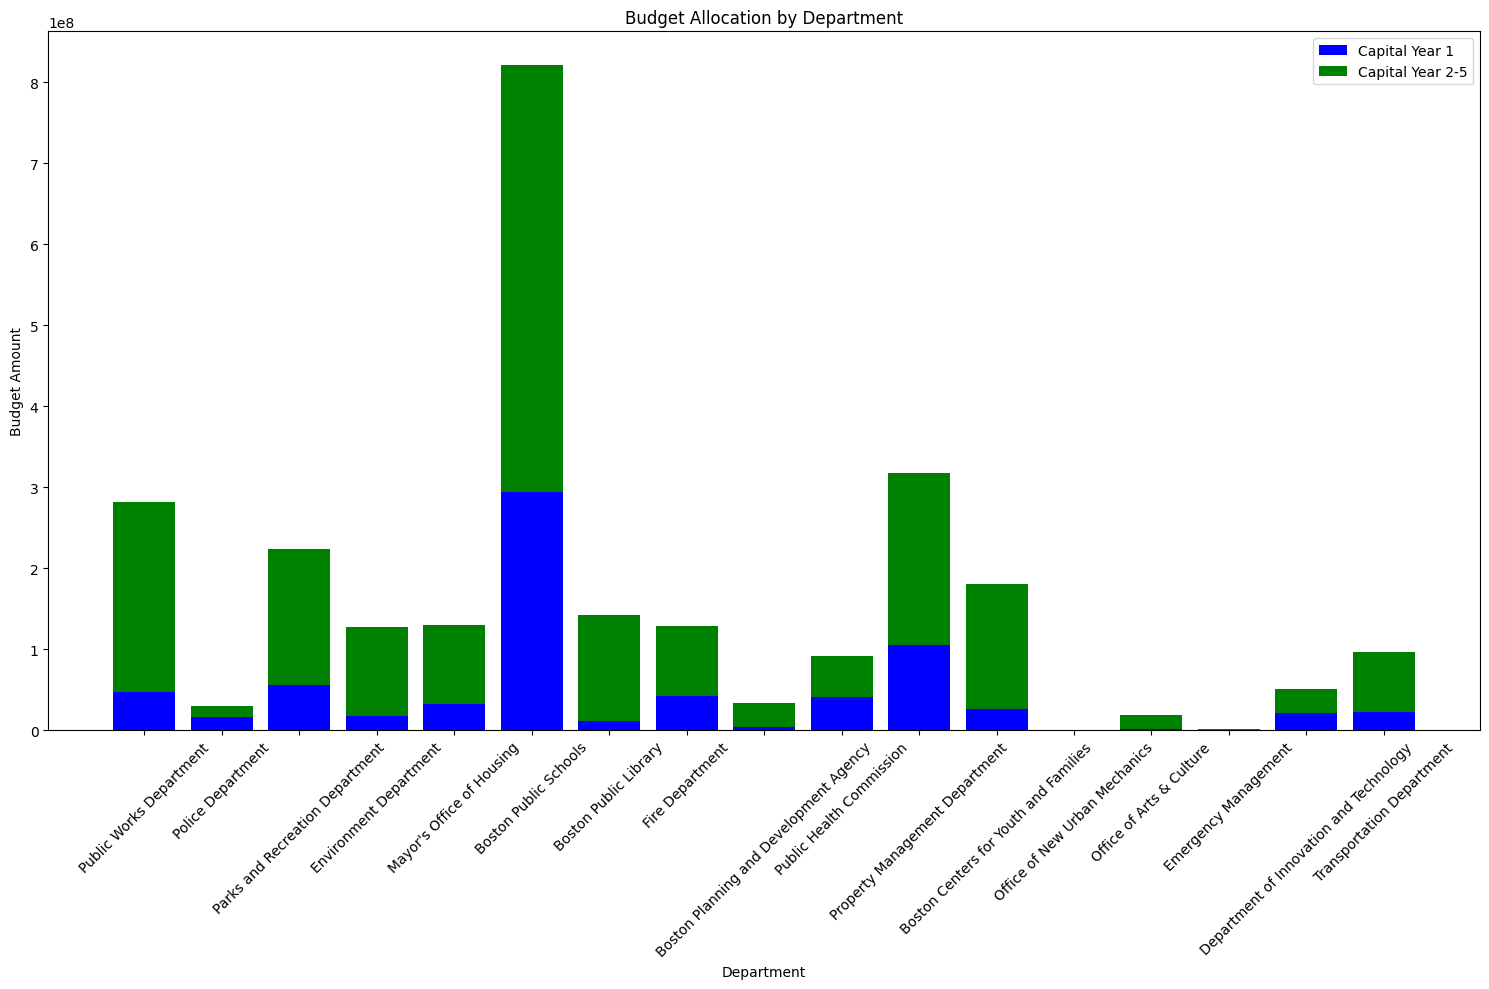

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# df = pd.read_csv("/content/drive/My Drive/DS/fy24-capital-budget-plan-recommended.csv")

# Aggregate by Department
grouped = df.groupby('Department').agg({
    ' CapitalYear_1 ': 'sum',
    'Capital_Year_25': 'sum',
    'Total_Project_Budget': 'sum'
}).sort_values(by='Total_Project_Budget', ascending=False)

# Plotting the data
plt.figure(figsize=(15,10))
plt.bar(grouped.index, grouped[' CapitalYear_1 '], label='Capital Year 1', color='blue')
plt.bar(grouped.index, grouped['Capital_Year_25'], bottom=grouped[' CapitalYear_1 '], label='Capital Year 2-5', color='green')
plt.ylabel('Budget Amount')
plt.xlabel('Department')
plt.title('Budget Allocation by Department')
plt.xticks(rotation=45) # Rotate department names for better visibility
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
grouped_filtered = df.groupby('Department').agg({
    'Capital_Year_0': 'sum',  # Capital Year 1
    'Capital_Year_25': 'sum',  # Capital Year 2-5
}).reset_index()

# Calculating the percentages
grouped_filtered['Capital Year 1 %'] = (grouped_filtered['Capital_Year_0'] / grouped_filtered['Capital_Year_0'].sum()) * 100
grouped_filtered['Capital Year 2-5 %'] = (grouped_filtered['Capital_Year_25'] / grouped_filtered['Capital_Year_25'].sum()) * 100

# Creating the table
table_filtered = grouped_filtered[['Department', 'Capital_Year_0', 'Capital Year 1 %', 'Capital_Year_25', 'Capital Year 2-5 %']]
table_filtered.rename(columns={'Capital_Year_0': 'Capital Year 1', 'Capital_Year_25': 'Capital Year 2-5'}, inplace=True)
# table_filtered.head(len(Departments))  # Displaying the table for all specified departments
table_filtered

,Department,Capital Year 1,Capital Year 1 %,Capital Year 2-5,Capital Year 2-5 %
0,Boston Centers for Youth and Families,1840000,0.790916,154902125,7.989427
1,Boston Planning and Development Agency,170000,0.073074,29354783,1.514039
2,Boston Public Library,8010000,3.443064,130758203,6.744150
3,Boston Public Schools,71249815,30.626429,527733636,27.219055
4,Department of Innovation and Technology,7353000,3.160656,29985140,1.546551
5,Emergency Management,0,0.000000,1500000,0.077366
6,Environment Department,13625000,5.856648,110400474,5.694154
7,Fire Department,12855000,5.525667,86467628,4.459763
8,Mayor's Office of Housing,25750000,11.068528,97178179,5.012184
9,Office of Arts & Culture,825000,0.354623,16664650,0.859517


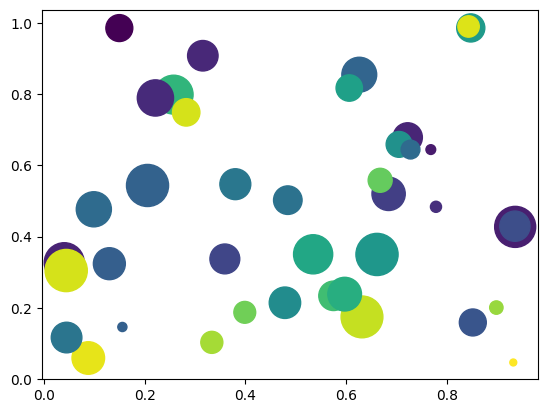

In [22]:
#sample bubble chart
import numpy as np
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
colors = np.random.rand(40)
plt.scatter(x, y, s=z*1000,c=colors)
plt.show()

<ipython-input-24-2c80e8f0c389>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(neighborhood_grouped['Neighborhood'], rotation=90)


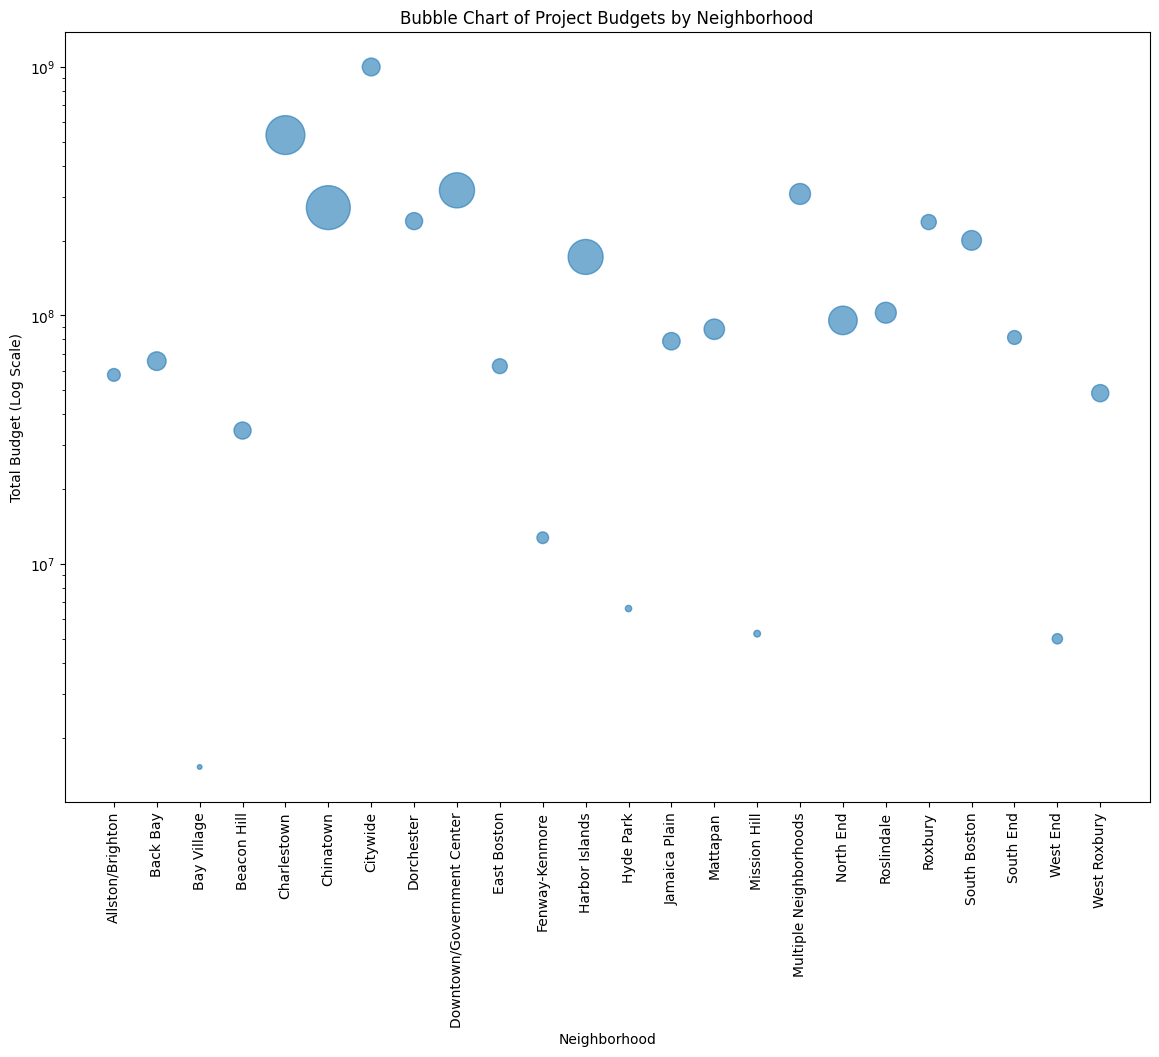

In [24]:
df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'], errors='coerce')
df.dropna(subset=['Total_Project_Budget'], inplace=True)
neighborhood_grouped = df.groupby('Neighborhood').agg(
    Total_Projects=('Project_Name', 'count'),
    Total_Budget=('Total_Project_Budget', 'sum')
).reset_index()

neighborhood_grouped['Avg_Project_Budget'] = (neighborhood_grouped['Total_Budget'] / neighborhood_grouped['Total_Projects'])

fig, ax = plt.subplots(figsize=(14, 10))

max_budget = neighborhood_grouped['Avg_Project_Budget'].max()
neighborhood_grouped['Bubble_Size'] = (neighborhood_grouped['Avg_Project_Budget'] / max_budget) * 1000

scatter = ax.scatter(
    x=neighborhood_grouped['Neighborhood'],
    y=neighborhood_grouped['Total_Budget'],
    s=neighborhood_grouped['Bubble_Size'],
    alpha=0.6
)

ax.set_yscale('log')
ax.set_title('Bubble Chart of Project Budgets by Neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Total Budget (Log Scale)')
ax.set_xticklabels(neighborhood_grouped['Neighborhood'], rotation=90)
plt.show()

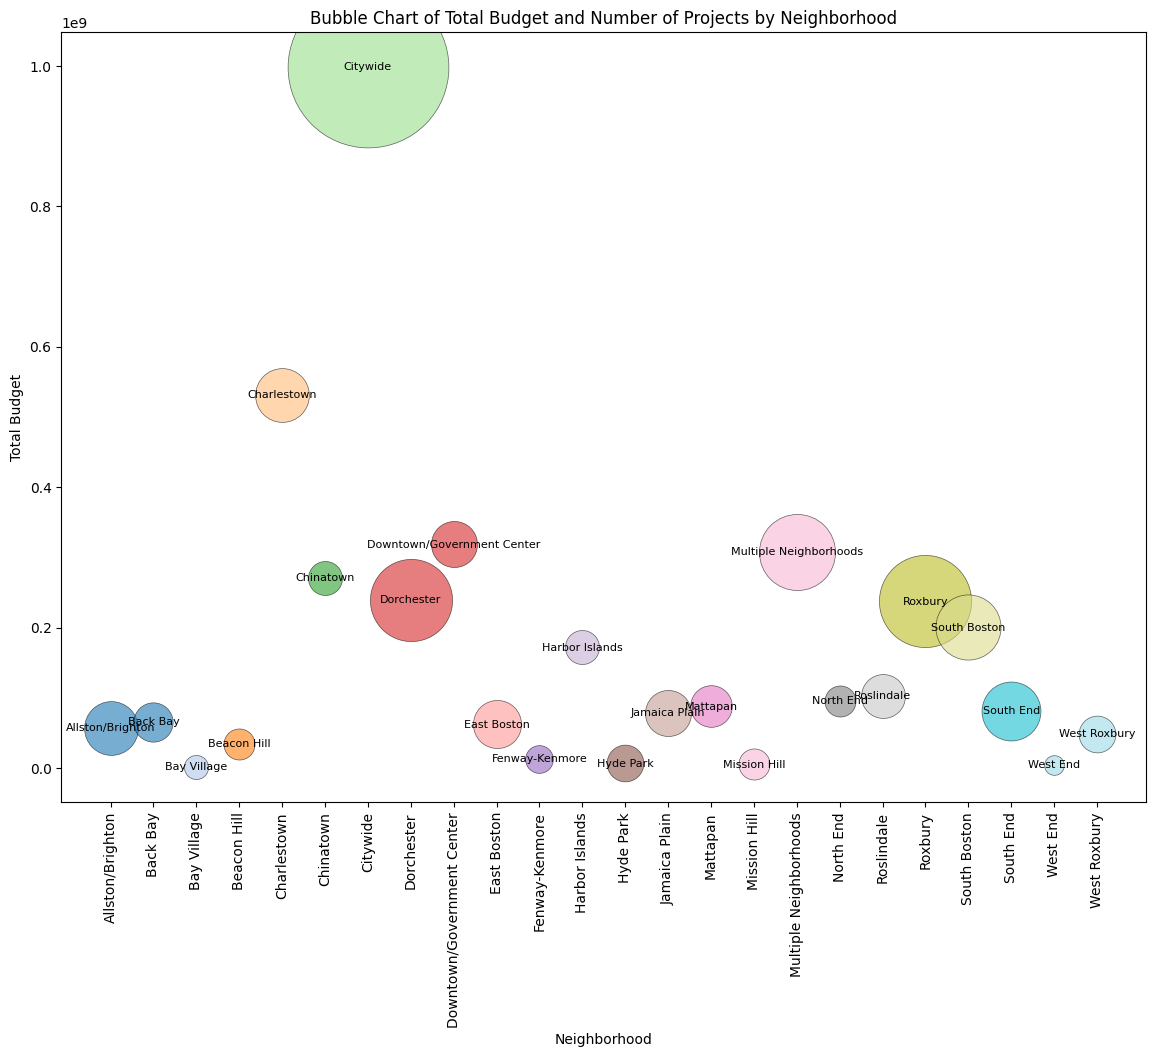

In [25]:

fig, ax = plt.subplots(figsize=(14, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(neighborhood_grouped)))
for i, row in neighborhood_grouped.iterrows():
    ax.scatter(
        x=row['Neighborhood'],
        y=row['Total_Budget'],
        s=row['Total_Projects'] * 100,  # Scale for visibility
        color=colors[i],
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

for i, row in neighborhood_grouped.iterrows():
    ax.text(row['Neighborhood'],
            row['Total_Budget'],
            row['Neighborhood'],
            fontsize=8,
            ha='center',
            va='center')

ax.set_title('Bubble Chart of Total Budget and Number of Projects by Neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Total Budget')
plt.xticks(rotation=90)
plt.show()


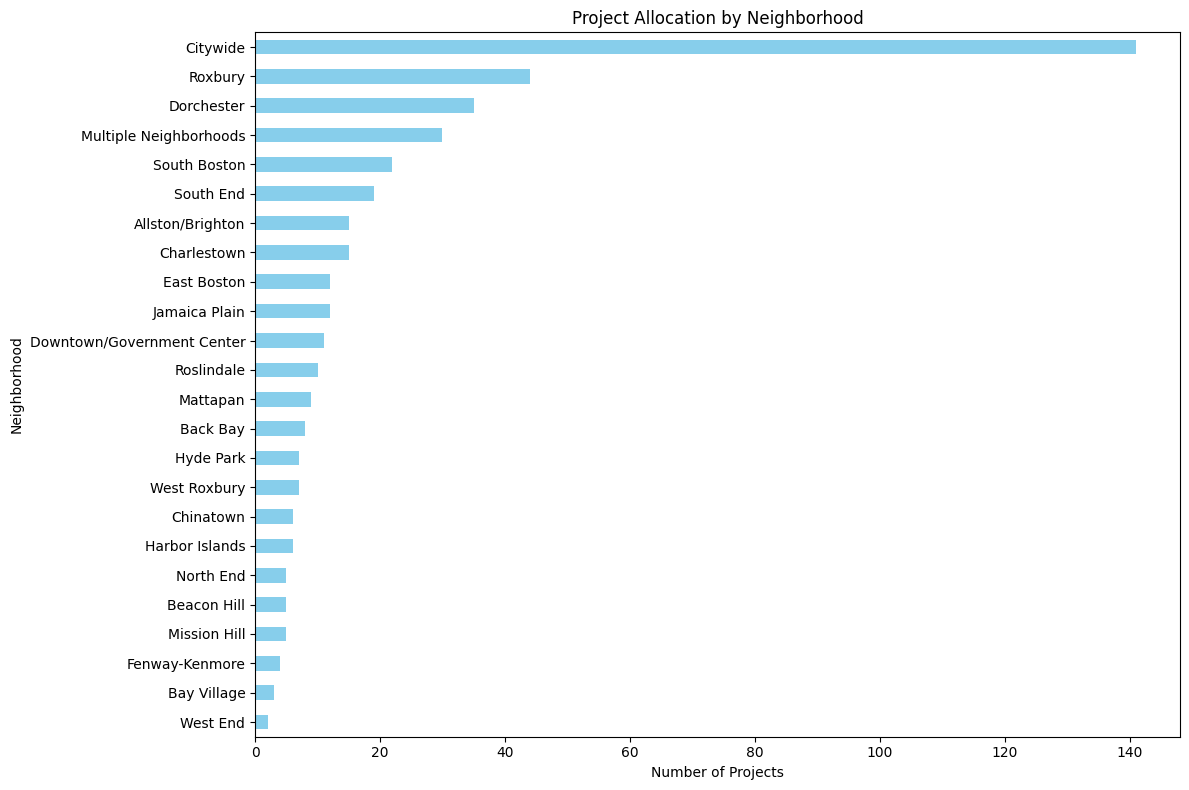

In [ ]:



neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12,8))
neighborhood_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Projects')
plt.ylabel('Neighborhood')
plt.title('Project Allocation by Neighborhood')
plt.tight_layout()
plt.show()


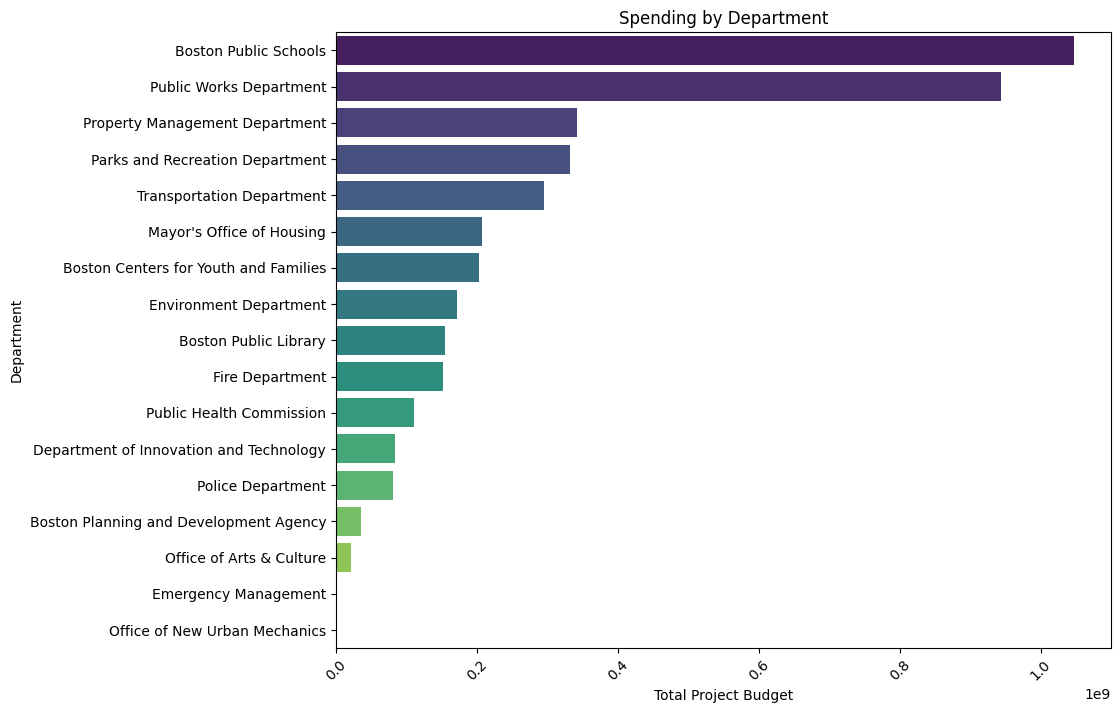

In [ ]:
#answering questions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'].str.replace(',', ''), errors='coerce')
department_spending = df.groupby('Department')['Total_Project_Budget'].sum().sort_values(ascending=False)

# Creating a bar plot for Spending by Department
plt.figure(figsize=(10, 8))
sns.barplot(y=department_spending.index, x=department_spending.values, palette="viridis")
plt.title('Spending by Department')
plt.xlabel('Total Project Budget')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.show()



This visualization shows how the city's budget is distributed across different departments.
Departments with higher bars indicate larger allocations, suggesting a focus or priority in those areas.
This analysis helps in understanding which departments are receiving the most funding and how resources are being allocated.

This visualization reflects how budget allocations are distributed among different city departments.

Departments with higher spending are indicative of their central role in the city's current agenda. For instance, if the Public Works Department has a significant allocation, it suggests a focus on infrastructure.

The distribution also sheds light on the city's operational priorities. Departments with larger budgets are likely undertaking major projects or are critical to the city's functioning. This could be in areas like education, public safety, health, or urban development.

Analyzing departmental spending can also reveal how the city balances various needs, such as immediate operational requirements versus long-term investments.

It's important to consider the context of each department's role. For example, a high budget in the transportation department could indicate major public transit projects, which have long-term benefits for the city.

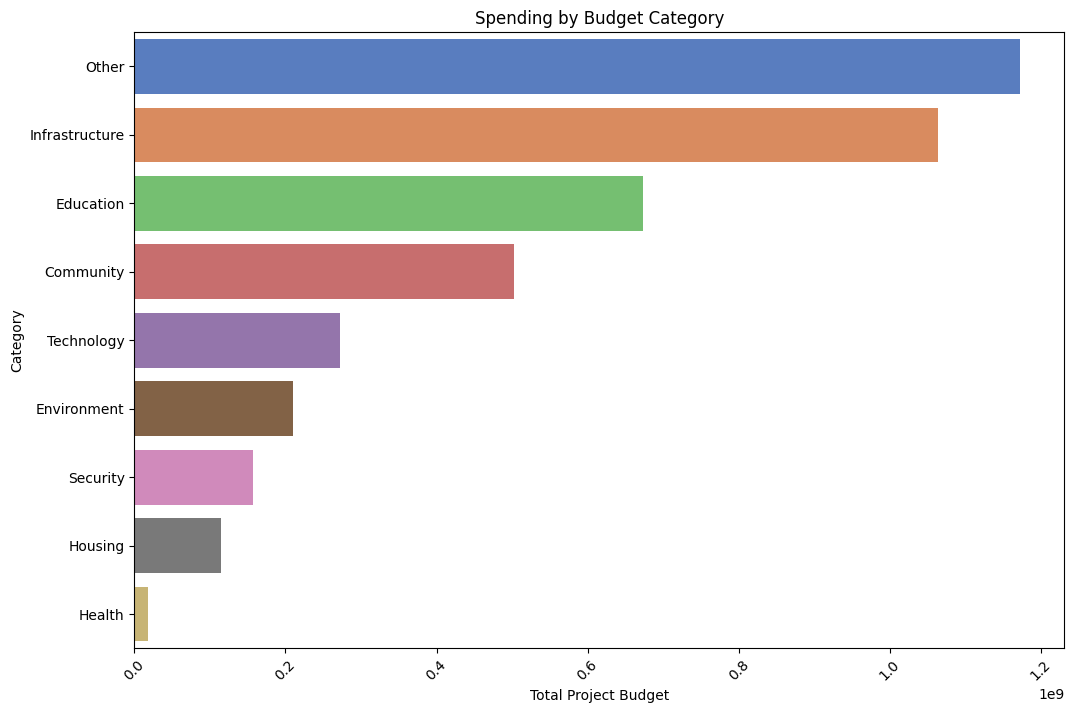

In [ ]:

# keywords = {
#     'Infrastructure': ['infrastructure', 'road', 'bridge', 'transport', 'utility'],
#     'Technology': ['technology', 'IT', 'system', 'software'],
#     'Community': ['community', 'recreation', 'park', 'public space'],
#     'Education': ['school', 'education', 'learning', 'classroom'],
#     'Health': ['health', 'medical', 'hospital', 'clinic'],
#     'Security': ['security', 'safety', 'police', 'fire'],
#     'Environment': ['environment', 'climate', 'energy', 'green'],
#     'Housing': ['housing', 'residence', 'home', 'accommodation']
# }


# def categorize(text, keywords):
#     for category, keys in keywords.items():
#         if any(key in text.lower() for key in keys):
#             return category
#     return 'Other'

# df['Category'] = df['Scope_Of_Work'].apply(lambda x: categorize(x, keywords) if isinstance(x, str) else 'Other')
# category_spending = df.groupby('Category')['Total_Project_Budget'].sum().sort_values(ascending=False)
# plt.figure(figsize=(12, 8))
# sns.barplot(y=category_spending.index, x=category_spending.values, palette="muted")
# plt.title('Spending by Budget Category')
# plt.xlabel('Total Project Budget')
# plt.ylabel('Category')
# plt.xticks(rotation=45)
# plt.show()

This chart categorizes spending into different areas based on the scope of work.
It's a way to visualize how funds are allocated to various sectors such as infrastructure, technology, education, etc.
This analysis is particularly useful in identifying the city's priorities in terms of sector-specific developments and initiatives.
The categorization is inferred from the 'Scope_Of_Work' and may not capture all nuances, but it provides a general overview of spending trends across different sectors.

This chart categorizes spending into different sectors based on the scope of work, providing insights into the areas where the city is investing most heavily.

High spending in certain categories like infrastructure, technology, or community development highlights the city's strategic objectives in these areas. It can indicate a focus on modernizing infrastructure, improving community facilities, or investing in technology upgrades.

The distribution of funds across categories can also point to the city's approach to balanced development. A diverse spread across multiple categories suggests a holistic approach, while concentration in a few areas might indicate targeted initiatives.

The categorization helps in understanding how the city's budget is being utilized to address various challenges and opportunities. For example, significant spending in environmental initiatives could reflect a commitment to sustainability.

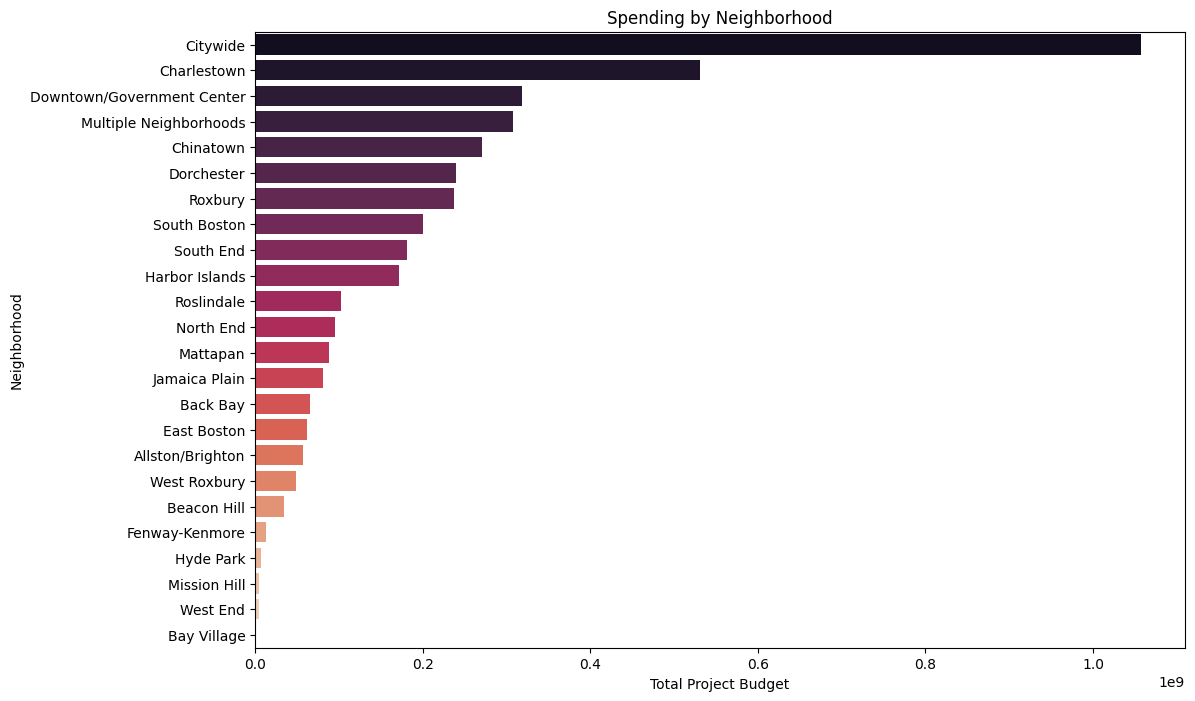

In [ ]:
# df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'].str.replace(',', ''), errors='coerce')
neighborhood_spending = df.groupby('Neighborhood')['Total_Project_Budget'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=neighborhood_spending.index, x=neighborhood_spending.values, palette="rocket")
plt.title('Spending by Neighborhood')
plt.xlabel('Total Project Budget')
plt.ylabel('Neighborhood')
plt.show()

Spending by Geography (Neighborhood)
This bar chart shows the distribution of the total project budget across different neighborhoods in Boston.
The neighborhoods with the highest spending are at the top, indicating a larger allocation of funds. This could be due to larger or more numerous projects, or a focus on specific development needs in those areas.
Analyzing spending by neighborhood helps in understanding which areas of the city are receiving more attention in terms of capital investments, potentially highlighting regions with greater infrastructural or community needs.

the distribution of funds across different neighborhoods indicates the city's focus areas. Neighborhoods with higher spending could be undergoing significant development projects, infrastructure upgrades, or community enhancements.

The disparities in spending between neighborhoods might reflect differing levels of need, population density, or strategic priorities of the city. For example, areas with aging infrastructure or rapid population growth might receive more funding.

This visualization also raises questions about equity and balanced development. Are all neighborhoods receiving fair attention, or are some consistently underfunded? Understanding these dynamics is crucial for equitable urban planning.

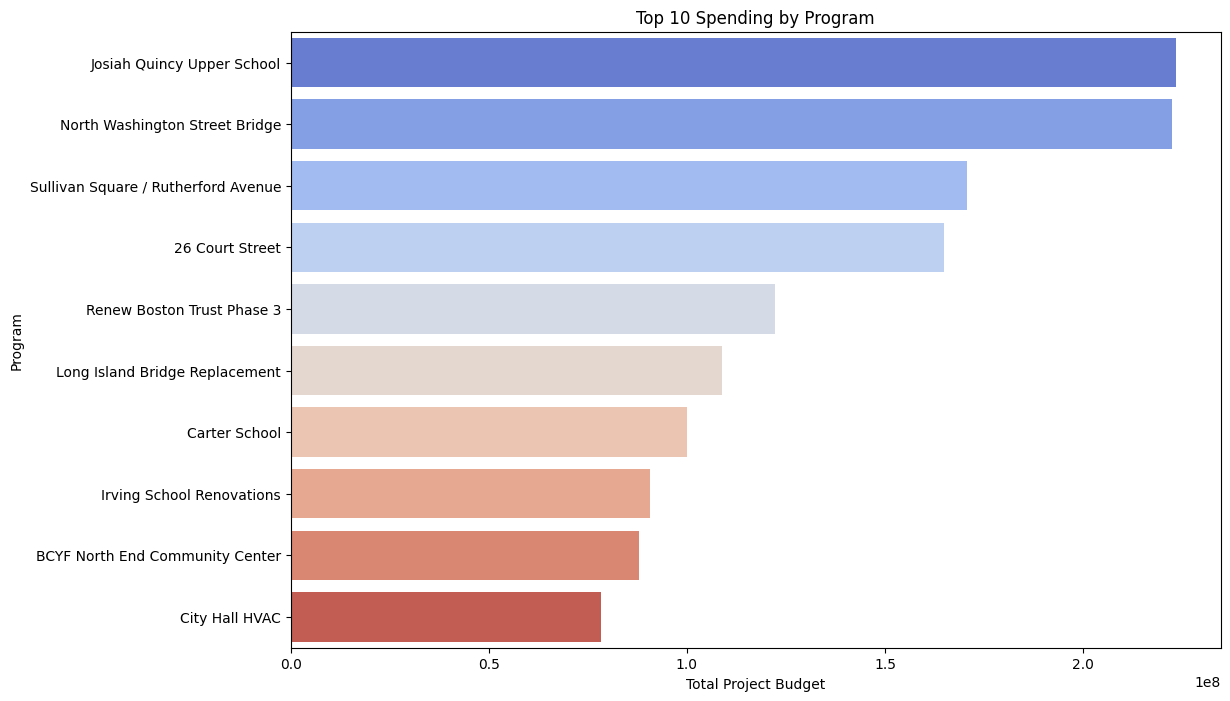

In [ ]:
program_spending = df.groupby('Project_Name')['Total_Project_Budget'].sum().sort_values(ascending=False)[:10]  # Top 10 programs

# Creating a bar plot for Spending by Program
plt.figure(figsize=(12, 8))
sns.barplot(y=program_spending.index, x=program_spending.values, palette="coolwarm")
plt.title('Top 10 Spending by Program')
plt.xlabel('Total Project Budget')
plt.ylabel('Program')
plt.show()

Spending by Program
The second bar chart displays the top 10 programs in terms of budget allocation.
This visualization offers insights into specific projects that are prioritized within the city's capital plan.
Programs with higher budget allocations suggest key areas of focus for the city, such as major infrastructure projects, community development, or environmental initiatives.
This analysis is crucial for understanding the city's strategic objectives and how they translate into specific program investments.

The programs with the highest funding indicate the city's current priorities. Large-scale projects, perhaps in infrastructure or public services, typically require more significant investments.

The nature of the top-funded programs can reveal a lot about the city's strategic goals. For instance, if environmental projects are receiving significant funding, it may indicate a focus on sustainability. If educational facilities are top-funded, it suggests investment in the future workforce and community development.

Additionally, the diversity (or lack thereof) in the types of programs funded can indicate how diverse the city's investment portfolio is. A concentration in certain types of projects might suggest a targeted approach, while a more varied distribution could indicate a broader, more balanced development strategy.

In [ ]:
df['Total_Project_Budget'] = pd.to_numeric(df['Total_Project_Budget'], errors='coerce')
# Handling any new missing values after conversion
df['Total_Project_Budget'].fillna(df['Total_Project_Budget'].median(), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#encoding categories into numericla values
df['Department'] = le.fit_transform(df['Department'])

#for text data processing, if needed, for example, making all text lowercase, removing punctuation, etc.
df['Scope_Of_Work'] = df['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')
print(df.head())

   Department                                Project_Name  \
0           0       BCYF Security and Technology Upgrades   
1           0  BCYF Tobin Community Center Retaining Wall   
2           0             BCYF North End Community Center   
3           0                                Pool Repairs   
4           0                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  improvements to technology infrastructure and ...   
1  repair or replace the retaining wall adjacent ...   
2  develop a design for a new north end community...   
3  renovate and upgrade locker rooms and pools in...   
4  engage youth across the city to create a capit...   

                           PM_Department           Project_Status  \
0  Boston Centers for Youth and Families          To Be Scheduled   
1           Public Facilities Department                In Design   
2           Public Facilities Department                In Design   
3  Boston Centers fo

<ipython-input-10-eb23e1f46d7c>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Scope_Of_Work'] = df['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')
